# Run on google colab gpu

In [1]:
!pip install flair

!pip install scispacy==0.2.5

!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.5/en_core_sci_sm-0.2.5.tar.gz

  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.5/en_core_sci_sm-0.2.5.tar.gz (33.1 MB)
  Created wheel for en-core-sci-sm: filename=en_core_sci_sm-0.2.5-py3-none-any.whl size=33155834 sha256=bc15d427b1d2b0fcabc44c09375101e8480cc26c066f5b50209c32bb94b2eb2a
  Stored in directory: /Users/abhigyaurja/Library/Caches/pip/wheels/b8/31/95/e58e692aba89fb29e03f4cc865fd7999b48d8775b7be37bfd4
Successfully built en-core-sci-sm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
from typing import List
from flair.data import Corpus
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings, FlairEmbeddings, TransformerWordEmbeddings, PooledFlairEmbeddings
import flair.datasets
from flair.data import MultiCorpus

Change corpus and embedding according to the experiment.

In [3]:
# 1. get the corpus
#corpus: Corpus = flair.datasets.BIONLP2013_CG()
corpus: Corpus = flair.datasets.NCBI_DISEASE()
#corpus: Corpus = flair.datasets.CDR()
#corpus: Corpus = flair.datasets.BIO_INFER()

#corpus: MultiCorpus = MultiCorpus([flair.datasets.BIONLP2013_CG(), flair.datasets.CDR(), flair.datasets.NCBI_DISEASE()])
#corpus: MultiCorpus = MultiCorpus([flair.datasets.BIONLP2013_CG(), flair.datasets.BIO_INFER()])

print(corpus)

2020-12-05 23:31:08,219 https://www.ncbi.nlm.nih.gov/CBBresearch/Dogan/DISEASE/NCBItrainset_corpus.zip not found in cache, downloading to /var/folders/t_/rmzy14rd4bx0sxb1hrbvf3q40000gn/T/tmpziv8732h


100%|██████████| 324523/324523 [00:00<00:00, 446900.51B/s]

2020-12-05 23:31:09,253 copying /var/folders/t_/rmzy14rd4bx0sxb1hrbvf3q40000gn/T/tmpziv8732h to cache at /Users/abhigyaurja/.flair/datasets/ncbi_disease/original/NCBItrainset_corpus.zip
2020-12-05 23:31:09,255 removing temp file /var/folders/t_/rmzy14rd4bx0sxb1hrbvf3q40000gn/T/tmpziv8732h


2020-12-05 23:31:09,524 https://www.ncbi.nlm.nih.gov/CBBresearch/Dogan/DISEASE/NCBIdevelopset_corpus.zip not found in cache, downloading to /var/folders/t_/rmzy14rd4bx0sxb1hrbvf3q40000gn/T/tmpoyb4nfi9


100%|██████████| 57666/57666 [00:00<00:00, 506370.19B/s]

2020-12-05 23:31:09,914 copying /var/folders/t_/rmzy14rd4bx0sxb1hrbvf3q40000gn/T/tmpoyb4nfi9 to cache at /Users/abhigyaurja/.flair/datasets/ncbi_disease/original/NCBIdevelopset_corpus.zip
2020-12-05 23:31:09,916 removing temp file /var/folders/t_/rmzy14rd4bx0sxb1hrbvf3q40000gn/T/tmpoyb4nfi9


2020-12-05 23:31:10,212 https://www.ncbi.nlm.nih.gov/CBBresearch/Dogan/DISEASE/NCBItestset_corpus.zip not found in cache, downloading to /var/folders/t_/rmzy14rd4bx0sxb1hrbvf3q40000gn/T/tmpu2zcawp3


100%|██████████| 60234/60234 [00:00<00:00, 380421.33B/s]

2020-12-05 23:31:10,633 copying /var/folders/t_/rmzy14rd4bx0sxb1hrbvf3q40000gn/T/tmpu2zcawp3 to cache at /Users/abhigyaurja/.flair/datasets/ncbi_disease/original/NCBItestset_corpus.zip
2020-12-05 23:31:10,634 removing temp file /var/folders/t_/rmzy14rd4bx0sxb1hrbvf3q40000gn/T/tmpu2zcawp3



Converting to CoNLL: 100%|██████████| 100/100 [00:02<00:00, 40.90it/s]

2020-12-05 23:31:30,493 Reading data from /Users/abhigyaurja/.flair/datasets/ncbi_disease
2020-12-05 23:31:30,493 Train: /Users/abhigyaurja/.flair/datasets/ncbi_disease/SciSpacySentenceSplitter_core_sci_sm_0.2.5_SciSpacyTokenizer_core_sci_sm_0.2.5_train.conll
2020-12-05 23:31:30,494 Dev: /Users/abhigyaurja/.flair/datasets/ncbi_disease/SciSpacySentenceSplitter_core_sci_sm_0.2.5_SciSpacyTokenizer_core_sci_sm_0.2.5_dev.conll
2020-12-05 23:31:30,494 Test: /Users/abhigyaurja/.flair/datasets/ncbi_disease/SciSpacySentenceSplitter_core_sci_sm_0.2.5_SciSpacyTokenizer_core_sci_sm_0.2.5_test.conll


Corpus: 5331 train + 906 dev + 905 test sentences


In [4]:
# 2. what tag do we want to predict?
tag_type = 'ner'

In [5]:
# 3. make the tag dictionary from the corpus
tag_dictionary = corpus.make_tag_dictionary(tag_type=tag_type)
print(tag_dictionary)

Dictionary with 8 tags: <unk>, O, B-Disease, E-Disease, S-Disease, I-Disease, <START>, <STOP>


In [6]:
#Choose the embeddings according to experiment.
# 4. initialize embeddings
bert_embedding = TransformerWordEmbeddings('bert-base-multilingual-cased')

glove_embedding = WordEmbeddings('glove')

fwd = PooledFlairEmbeddings('pubmed-forward')
bwd = PooledFlairEmbeddings('pubmed-backward')

embedding_types : List[TokenEmbeddings] = [glove_embedding,
                   #fwd,
                   #bwd,
                   #bert_embedding,
                   ]

embeddings: StackedEmbeddings = StackedEmbeddings(embeddings=embedding_types)


In [7]:
# 5. initialize sequence tagger
from flair.models import SequenceTagger

tagger: SequenceTagger = SequenceTagger(hidden_size = 256,
                                        embeddings = embeddings,
                                        tag_dictionary = tag_dictionary,
                                        tag_type = tag_type,
                                        use_crf = True)

In [8]:
# 6. initialize trainer
from flair.trainers import ModelTrainer

trainer: ModelTrainer = ModelTrainer(tagger, corpus)

Change name of trainer according to the experiment running!

In [9]:
# 7. start training
trainer.train('drive/MyDrive/ANLP/resources/taggers/glove_ncbi',
              learning_rate = 0.1,
              mini_batch_size = 32,
              max_epochs = 100,
              write_weights = True,
#              embeddings_storage_mode = 'none',
              checkpoint = True)

2020-12-05 23:31:39,112 ----------------------------------------------------------------------------------------------------
2020-12-05 23:31:39,113 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings('glove')
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=100, out_features=100, bias=True)
  (rnn): LSTM(100, 256, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=512, out_features=8, bias=True)
  (beta): 1.0
  (weights): None
  (weight_tensor) None
)"
2020-12-05 23:31:39,113 ----------------------------------------------------------------------------------------------------
2020-12-05 23:31:39,114 Corpus: "Corpus: 5331 train + 906 dev + 905 test sentences"
2020-12-05 23:31:39,115 ----------------------------------------------------------------------------------------------------
2020-12-05 23:31:39,115 Parameters:
2020-12-05 23:31:39,116  - learning_r

2020-12-05 23:34:25,345 epoch 5 - iter 64/167 - loss 2.22890075 - samples/sec: 142.04 - lr: 0.100000
2020-12-05 23:34:28,099 epoch 5 - iter 80/167 - loss 2.21796947 - samples/sec: 186.95 - lr: 0.100000
2020-12-05 23:34:31,187 epoch 5 - iter 96/167 - loss 2.19154063 - samples/sec: 166.65 - lr: 0.100000
2020-12-05 23:34:34,327 epoch 5 - iter 112/167 - loss 2.17857077 - samples/sec: 163.87 - lr: 0.100000
2020-12-05 23:34:37,563 epoch 5 - iter 128/167 - loss 2.17294077 - samples/sec: 158.93 - lr: 0.100000
2020-12-05 23:34:40,892 epoch 5 - iter 144/167 - loss 2.13909244 - samples/sec: 154.52 - lr: 0.100000
2020-12-05 23:34:44,289 epoch 5 - iter 160/167 - loss 2.19147705 - samples/sec: 151.37 - lr: 0.100000
2020-12-05 23:34:45,518 ----------------------------------------------------------------------------------------------------
2020-12-05 23:34:45,519 EPOCH 5 done: loss 2.1771 - lr 0.1000000
2020-12-05 23:34:47,087 DEV : loss 1.555709958076477 - score 0.6082
2020-12-05 23:34:47,094 BAD EPO

2020-12-05 23:37:52,141 DEV : loss 1.089939832687378 - score 0.7122
2020-12-05 23:37:52,146 BAD EPOCHS (no improvement): 0
saving best model
2020-12-05 23:37:55,680 ----------------------------------------------------------------------------------------------------
2020-12-05 23:37:58,660 epoch 11 - iter 16/167 - loss 1.81170744 - samples/sec: 171.89 - lr: 0.100000
2020-12-05 23:38:02,274 epoch 11 - iter 32/167 - loss 1.84504015 - samples/sec: 142.36 - lr: 0.100000
2020-12-05 23:38:05,024 epoch 11 - iter 48/167 - loss 1.83543838 - samples/sec: 187.16 - lr: 0.100000
2020-12-05 23:38:08,115 epoch 11 - iter 64/167 - loss 1.80798086 - samples/sec: 166.50 - lr: 0.100000
2020-12-05 23:38:11,526 epoch 11 - iter 80/167 - loss 1.79860343 - samples/sec: 150.87 - lr: 0.100000
2020-12-05 23:38:14,816 epoch 11 - iter 96/167 - loss 1.79443346 - samples/sec: 156.35 - lr: 0.100000
2020-12-05 23:38:17,740 epoch 11 - iter 112/167 - loss 1.75923440 - samples/sec: 176.04 - lr: 0.100000
2020-12-05 23:38:21

2020-12-05 23:41:28,624 epoch 16 - iter 112/167 - loss 1.52444188 - samples/sec: 175.85 - lr: 0.100000
2020-12-05 23:41:31,564 epoch 16 - iter 128/167 - loss 1.53654454 - samples/sec: 175.04 - lr: 0.100000
2020-12-05 23:41:35,139 epoch 16 - iter 144/167 - loss 1.54519769 - samples/sec: 143.97 - lr: 0.100000
2020-12-05 23:41:38,396 epoch 16 - iter 160/167 - loss 1.56154261 - samples/sec: 157.93 - lr: 0.100000
2020-12-05 23:41:39,528 ----------------------------------------------------------------------------------------------------
2020-12-05 23:41:39,528 EPOCH 16 done: loss 1.5619 - lr 0.1000000
2020-12-05 23:41:41,075 DEV : loss 1.0492113828659058 - score 0.747
2020-12-05 23:41:41,081 BAD EPOCHS (no improvement): 0
saving best model
2020-12-05 23:41:44,592 ----------------------------------------------------------------------------------------------------
2020-12-05 23:41:47,829 epoch 17 - iter 16/167 - loss 1.51204037 - samples/sec: 158.26 - lr: 0.100000
2020-12-05 23:41:51,328 epoch

2020-12-05 23:44:53,477 epoch 22 - iter 16/167 - loss 1.39871104 - samples/sec: 156.31 - lr: 0.100000
2020-12-05 23:44:56,692 epoch 22 - iter 32/167 - loss 1.37727336 - samples/sec: 160.06 - lr: 0.100000
2020-12-05 23:44:59,920 epoch 22 - iter 48/167 - loss 1.45002876 - samples/sec: 159.45 - lr: 0.100000
2020-12-05 23:45:02,953 epoch 22 - iter 64/167 - loss 1.40519604 - samples/sec: 169.73 - lr: 0.100000
2020-12-05 23:45:05,922 epoch 22 - iter 80/167 - loss 1.38844226 - samples/sec: 173.31 - lr: 0.100000
2020-12-05 23:45:08,661 epoch 22 - iter 96/167 - loss 1.37717318 - samples/sec: 187.96 - lr: 0.100000
2020-12-05 23:45:11,851 epoch 22 - iter 112/167 - loss 1.41059978 - samples/sec: 161.32 - lr: 0.100000
2020-12-05 23:45:14,968 epoch 22 - iter 128/167 - loss 1.44530803 - samples/sec: 165.10 - lr: 0.100000
2020-12-05 23:45:18,091 epoch 22 - iter 144/167 - loss 1.43617248 - samples/sec: 164.74 - lr: 0.100000
2020-12-05 23:45:21,788 epoch 22 - iter 160/167 - loss 1.43418112 - samples/sec

2020-12-05 23:48:21,662 epoch 27 - iter 144/167 - loss 1.24511295 - samples/sec: 153.64 - lr: 0.050000
2020-12-05 23:48:24,961 epoch 27 - iter 160/167 - loss 1.25182730 - samples/sec: 155.90 - lr: 0.050000
2020-12-05 23:48:26,496 ----------------------------------------------------------------------------------------------------
2020-12-05 23:48:26,496 EPOCH 27 done: loss 1.2541 - lr 0.0500000
2020-12-05 23:48:28,053 DEV : loss 0.8343885540962219 - score 0.7967
2020-12-05 23:48:28,059 BAD EPOCHS (no improvement): 0
saving best model
2020-12-05 23:48:31,487 ----------------------------------------------------------------------------------------------------
2020-12-05 23:48:34,585 epoch 28 - iter 16/167 - loss 1.29133854 - samples/sec: 165.38 - lr: 0.050000
2020-12-05 23:48:37,374 epoch 28 - iter 32/167 - loss 1.24213507 - samples/sec: 184.62 - lr: 0.050000
2020-12-05 23:48:40,380 epoch 28 - iter 48/167 - loss 1.24927302 - samples/sec: 171.26 - lr: 0.050000
2020-12-05 23:48:43,919 epoch 

2020-12-05 23:51:45,975 epoch 33 - iter 48/167 - loss 1.18614762 - samples/sec: 144.39 - lr: 0.050000
2020-12-05 23:51:49,014 epoch 33 - iter 64/167 - loss 1.16702372 - samples/sec: 169.50 - lr: 0.050000
2020-12-05 23:51:51,950 epoch 33 - iter 80/167 - loss 1.16363457 - samples/sec: 175.35 - lr: 0.050000
2020-12-05 23:51:54,815 epoch 33 - iter 96/167 - loss 1.16851426 - samples/sec: 179.72 - lr: 0.050000
2020-12-05 23:51:57,870 epoch 33 - iter 112/167 - loss 1.16024036 - samples/sec: 168.44 - lr: 0.050000
2020-12-05 23:52:01,314 epoch 33 - iter 128/167 - loss 1.16662431 - samples/sec: 149.41 - lr: 0.050000
2020-12-05 23:52:04,564 epoch 33 - iter 144/167 - loss 1.19372937 - samples/sec: 158.25 - lr: 0.050000
2020-12-05 23:52:07,751 epoch 33 - iter 160/167 - loss 1.19360016 - samples/sec: 161.54 - lr: 0.050000
2020-12-05 23:52:09,133 ----------------------------------------------------------------------------------------------------
2020-12-05 23:52:09,134 EPOCH 33 done: loss 1.1949 - lr

2020-12-05 23:55:13,184 ----------------------------------------------------------------------------------------------------
2020-12-05 23:55:13,185 EPOCH 38 done: loss 1.1599 - lr 0.0250000
2020-12-05 23:55:14,736 DEV : loss 0.8016077876091003 - score 0.7992
2020-12-05 23:55:14,743 BAD EPOCHS (no improvement): 1
2020-12-05 23:55:16,486 ----------------------------------------------------------------------------------------------------
2020-12-05 23:55:19,544 epoch 39 - iter 16/167 - loss 1.08422049 - samples/sec: 167.56 - lr: 0.025000
2020-12-05 23:55:23,083 epoch 39 - iter 32/167 - loss 1.16648681 - samples/sec: 145.31 - lr: 0.025000
2020-12-05 23:55:26,484 epoch 39 - iter 48/167 - loss 1.14643927 - samples/sec: 151.24 - lr: 0.025000
2020-12-05 23:55:29,665 epoch 39 - iter 64/167 - loss 1.17014312 - samples/sec: 161.74 - lr: 0.025000
2020-12-05 23:55:32,546 epoch 39 - iter 80/167 - loss 1.16151424 - samples/sec: 178.75 - lr: 0.025000
2020-12-05 23:55:35,724 epoch 39 - iter 96/167 - l

2020-12-05 23:58:35,042 epoch 44 - iter 80/167 - loss 1.06660636 - samples/sec: 137.77 - lr: 0.012500
2020-12-05 23:58:38,047 epoch 44 - iter 96/167 - loss 1.09264565 - samples/sec: 171.40 - lr: 0.012500
2020-12-05 23:58:41,110 epoch 44 - iter 112/167 - loss 1.09115092 - samples/sec: 168.01 - lr: 0.012500
2020-12-05 23:58:44,159 epoch 44 - iter 128/167 - loss 1.09513116 - samples/sec: 168.75 - lr: 0.012500
2020-12-05 23:58:47,253 epoch 44 - iter 144/167 - loss 1.10382577 - samples/sec: 166.39 - lr: 0.012500
2020-12-05 23:58:50,438 epoch 44 - iter 160/167 - loss 1.11093644 - samples/sec: 161.63 - lr: 0.012500
2020-12-05 23:58:52,013 ----------------------------------------------------------------------------------------------------
2020-12-05 23:58:52,014 EPOCH 44 done: loss 1.1165 - lr 0.0125000
2020-12-05 23:58:54,052 DEV : loss 0.8024684190750122 - score 0.8056
2020-12-05 23:58:54,058 BAD EPOCHS (no improvement): 3
2020-12-05 23:58:55,767 ---------------------------------------------

Epoch    49: reducing learning rate of group 0 to 3.1250e-03.
2020-12-06 00:01:55,737 BAD EPOCHS (no improvement): 4
2020-12-06 00:01:57,439 ----------------------------------------------------------------------------------------------------
2020-12-06 00:02:00,328 epoch 50 - iter 16/167 - loss 1.11491406 - samples/sec: 177.32 - lr: 0.003125
2020-12-06 00:02:03,506 epoch 50 - iter 32/167 - loss 1.12720992 - samples/sec: 161.88 - lr: 0.003125
2020-12-06 00:02:07,184 epoch 50 - iter 48/167 - loss 1.11561990 - samples/sec: 139.76 - lr: 0.003125
2020-12-06 00:02:10,404 epoch 50 - iter 64/167 - loss 1.10470213 - samples/sec: 159.79 - lr: 0.003125
2020-12-06 00:02:13,563 epoch 50 - iter 80/167 - loss 1.10190578 - samples/sec: 162.98 - lr: 0.003125
2020-12-06 00:02:16,597 epoch 50 - iter 96/167 - loss 1.07152497 - samples/sec: 169.58 - lr: 0.003125
2020-12-06 00:02:19,582 epoch 50 - iter 112/167 - loss 1.06220494 - samples/sec: 172.59 - lr: 0.003125
2020-12-06 00:02:22,688 epoch 50 - iter 128

2020-12-06 00:05:22,534 epoch 55 - iter 112/167 - loss 1.04858226 - samples/sec: 161.44 - lr: 0.001563
2020-12-06 00:05:25,724 epoch 55 - iter 128/167 - loss 1.05744932 - samples/sec: 161.39 - lr: 0.001563
2020-12-06 00:05:28,561 epoch 55 - iter 144/167 - loss 1.06597112 - samples/sec: 181.47 - lr: 0.001563
2020-12-06 00:05:31,825 epoch 55 - iter 160/167 - loss 1.06018198 - samples/sec: 157.63 - lr: 0.001563
2020-12-06 00:05:33,267 ----------------------------------------------------------------------------------------------------
2020-12-06 00:05:33,267 EPOCH 55 done: loss 1.0665 - lr 0.0015625
2020-12-06 00:05:34,827 DEV : loss 0.7830172777175903 - score 0.8066
2020-12-06 00:05:34,833 BAD EPOCHS (no improvement): 2
2020-12-06 00:05:36,538 ----------------------------------------------------------------------------------------------------
2020-12-06 00:05:39,552 epoch 56 - iter 16/167 - loss 1.04304479 - samples/sec: 170.01 - lr: 0.001563
2020-12-06 00:05:42,744 epoch 56 - iter 32/167

2020-12-06 00:08:42,838 epoch 61 - iter 16/167 - loss 0.92761811 - samples/sec: 178.23 - lr: 0.000781
2020-12-06 00:08:46,612 epoch 61 - iter 32/167 - loss 1.04838682 - samples/sec: 136.27 - lr: 0.000781
2020-12-06 00:08:49,945 epoch 61 - iter 48/167 - loss 1.02237702 - samples/sec: 154.37 - lr: 0.000781
2020-12-06 00:08:53,017 epoch 61 - iter 64/167 - loss 1.02849853 - samples/sec: 167.56 - lr: 0.000781
2020-12-06 00:08:56,108 epoch 61 - iter 80/167 - loss 1.04599919 - samples/sec: 166.48 - lr: 0.000781
2020-12-06 00:08:59,269 epoch 61 - iter 96/167 - loss 1.02940895 - samples/sec: 162.92 - lr: 0.000781
2020-12-06 00:09:02,339 epoch 61 - iter 112/167 - loss 1.04130684 - samples/sec: 167.60 - lr: 0.000781
2020-12-06 00:09:05,590 epoch 61 - iter 128/167 - loss 1.06300077 - samples/sec: 158.27 - lr: 0.000781
2020-12-06 00:09:08,759 epoch 61 - iter 144/167 - loss 1.07283234 - samples/sec: 162.33 - lr: 0.000781
2020-12-06 00:09:11,882 epoch 61 - iter 160/167 - loss 1.07002371 - samples/sec

2020-12-06 00:12:12,982 epoch 66 - iter 144/167 - loss 1.06906330 - samples/sec: 144.43 - lr: 0.000195
2020-12-06 00:12:16,237 epoch 66 - iter 160/167 - loss 1.06523406 - samples/sec: 158.06 - lr: 0.000195
2020-12-06 00:12:17,506 ----------------------------------------------------------------------------------------------------
2020-12-06 00:12:17,506 EPOCH 66 done: loss 1.0580 - lr 0.0001953
2020-12-06 00:12:19,068 DEV : loss 0.7849699258804321 - score 0.8074
2020-12-06 00:12:19,074 BAD EPOCHS (no improvement): 1
2020-12-06 00:12:20,817 ----------------------------------------------------------------------------------------------------
2020-12-06 00:12:23,664 epoch 67 - iter 16/167 - loss 0.95357604 - samples/sec: 179.97 - lr: 0.000195
2020-12-06 00:12:26,786 epoch 67 - iter 32/167 - loss 1.05451047 - samples/sec: 164.86 - lr: 0.000195
2020-12-06 00:12:30,123 epoch 67 - iter 48/167 - loss 1.00916963 - samples/sec: 154.12 - lr: 0.000195
2020-12-06 00:12:33,225 epoch 67 - iter 64/167 -

{'test_score': 0.7756174461376774,
 'dev_score_history': [0.5170660856935366,
  0.5627906976744186,
  0.5803503427265803,
  0.6405045550105116,
  0.60822342901474,
  0.6722571628232005,
  0.6963249516441006,
  0.6829268292682926,
  0.6694796061884669,
  0.7121820615796519,
  0.718554551772064,
  0.716820440028389,
  0.732394366197183,
  0.7254623044096729,
  0.7410358565737051,
  0.7470383275261324,
  0.7753530166880616,
  0.7604512276045123,
  0.7592954990215264,
  0.7342430149447694,
  0.783587028457975,
  0.7866004962779156,
  0.7771428571428572,
  0.7831168831168831,
  0.7743097238895559,
  0.7812113720642769,
  0.7966857871255576,
  0.7941550190597204,
  0.7945205479452054,
  0.7942464040025016,
  0.8017565872020076,
  0.788785046728972,
  0.810126582278481,
  0.7987460815047022,
  0.8072445019404916,
  0.8059316569954867,
  0.7989918084436042,
  0.7992351816443595,
  0.804137039431157,
  0.8020631850419083,
  0.8040712468193384,
  0.8053265694356372,
  0.8032890575585072,
  0.805

In case training stops!

In [ ]:
from pathlib import Path

checkpoint = 'drive/MyDrive/ANLP/resources/taggers/glove_ncbi/checkpoint.pt'
trainer = ModelTrainer.load_checkpoint(checkpoint, corpus)
trainer.train('drive/MyDrive/ANLP/resources/taggers/glove_ncbi',
              learning_rate = 0.1,
              mini_batch_size = 32,
              max_epochs = 100,
              write_weights = True,
#              embeddings_storage_mode = 'none',
              checkpoint = True)

2020-12-06 00:16:26,000 ----------------------------------------------------------------------------------------------------
2020-12-06 00:16:26,001 WARNING: No LOSS found for test split in this data.
2020-12-06 00:16:26,001 Are you sure you want to plot LOSS and not another value?
2020-12-06 00:16:26,001 ----------------------------------------------------------------------------------------------------
2020-12-06 00:16:26,019 ----------------------------------------------------------------------------------------------------
2020-12-06 00:16:26,020 WARNING: No F1 found for test split in this data.
2020-12-06 00:16:26,020 Are you sure you want to plot F1 and not another value?
2020-12-06 00:16:26,020 ----------------------------------------------------------------------------------------------------
Loss and F1 plots are saved in resources/taggers/glove_ncbi/training.png


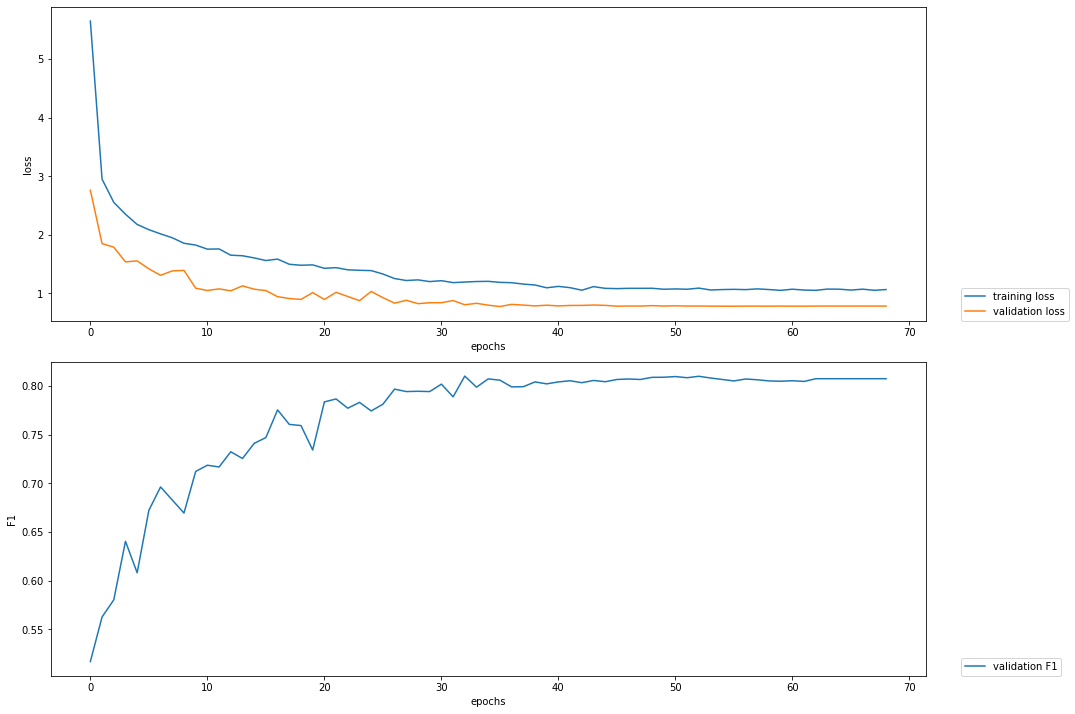

In [10]:
from flair.visual.training_curves import Plotter
plotter = Plotter()
plotter.plot_training_curves('drive/MyDrive/ANLP/resources/taggers/glove_ncbi/loss.tsv')

# References
https://github.com/flairNLP/flair/blob/master/resources/docs/TUTORIAL_7_TRAINING_A_MODEL.md